# Amazon Business Research Analyst Dataset

Objectives
1.	What food customers like the most
2.	Does weather influence what people eat
3.	What is the preferred mode of transportation used by the restaurant 
4.	What time do people pick their orders most?
5.	Which days are the busiest in the restaurant [which days do customers visit the restaurant the most]
6. Which days of the week does the restaurant delivers most patronize
7. What is the relationship between the time taken to deliver food and the distance travelled? 
8. What is the correlation between days of the week with respect to the type of vehicle used to deliver food and the distance covered? 
9. From which city does the restaurant get most orders 
10. Does the traffic density influence what time orders are made?

Machine learning scenario:

Mrs Ndidi ordered meals at the amazon restaurant on Thursday morning. Predict how long before she received her order if the delivery man used motorcycle bearing in mind that the customer  stays 9.760928 km away from the restaurant?




## Importing libraries and loading datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
food=pd.read_csv('cleaned_test.csv')
food.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Name:
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05,NaN,NaN,3,Drinks,electric_scooter,1.0,No,Metropolitian,object
1,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30,20:35,Windy,Jam,0,Snack,motorcycle,1.0,No,Metropolitian,object
2,0x9420,JAPRES09DEL03,23.0,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35,19:45,Stormy,Jam,0,Drinks,motorcycle,1.0,No,Metropolitian,object
3,0x72ee,JAPRES07DEL03,21.0,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15,17:20,Fog,Medium,1,Meal,scooter,1.0,No,Metropolitian,object
4,0xa759,CHENRES19DEL01,31.0,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25,18:40,Sunny,Medium,2,Drinks,scooter,1.0,No,Metropolitian,object


## Data Pre-processing: Data Cleaning

In [3]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11399 entries, 0 to 11398
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           11399 non-null  object 
 1   Delivery_person_ID           11399 non-null  object 
 2   Delivery_person_Age          10908 non-null  float64
 3   Delivery_person_Ratings      10892 non-null  float64
 4   Restaurant_latitude          11399 non-null  float64
 5   Restaurant_longitude         11399 non-null  float64
 6   Delivery_location_latitude   11399 non-null  float64
 7   Delivery_location_longitude  11399 non-null  float64
 8   Order_Date                   11399 non-null  object 
 9   Time_Orderd                  10955 non-null  object 
 10  Time_Order_picked            11399 non-null  object 
 11  Weather                      11241 non-null  object 
 12  Road_traffic_density         11245 non-null  object 
 13  Vehicle_conditio

In [4]:
updatedfood=pd.read_csv('updated.csv')
updatedfood.head()

,Unnamed: 0,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,1,0x4607_x,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,11:30,11:45,4,0,2,3,3,0.0,1,3,24.0
1,2,0xb379_x,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,19:45,19:50,3,1,2,3,4,1.0,1,1,33.0
2,3,0x20f7_x,BANGRES18DEL01,37,4.4,12.913041,77.683237,12.953041,77.723237,13:50,13:55,6,0,0,0,3,2.0,1,1,42.0
3,4,0x7804_x,HYDRES13DEL02,28,4.9,17.431477,78.400350,17.451477,78.420350,10:60,11:15,2,2,1,2,4,1.0,1,3,19.0
4,5,0x7faf_x,RANCHIRES07DEL01,37,4.6,23.359407,85.325055,23.429407,85.395055,23:50,23:60,3,2,0,2,3,1.0,1,1,25.0


Extracting time taken column from updated food dataset

In [5]:
Time_taken=updatedfood['Time_taken(min)']
Time_taken

0       24.0
1       33.0
2       42.0
3       19.0
4       25.0
        ... 
2437    29.0
2438    22.0
2439    28.0
2440    12.0
2441    36.0
Name: Time_taken(min), Length: 2442, dtype: float64

Adding time_taken column to the cleaned dataset

In [6]:
food['Time_taken']=Time_taken

converting the Order_Date to category datatype

In [7]:
food['Order_Date']=pd.to_datetime(food['Order_Date'])
food['Days']=food['Order_Date'].dt.strftime('%A')
food['Days']=food['Days'].astype('category')

C:\Users\juliy\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '30-03-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\juliy\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '29-03-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\juliy\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27-03-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\juliy\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15-02-2022' in DD/MM/YYYY format. Provide format or specif

Dropping off that 'Order_Date columns'because it has been converted to days

In [8]:
food.drop(['Order_Date'],axis='columns')


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,...,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Name:,Time_taken,Days
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,NaN,15:05,...,NaN,3,Drinks,electric_scooter,1.0,No,Metropolitian,object,24.0,Wednesday
1,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,77.696664,13.085377,77.806664,20:30,20:35,...,Jam,0,Snack,motorcycle,1.0,No,Metropolitian,object,33.0,Tuesday
2,0x9420,JAPRES09DEL03,23.0,4.5,26.911378,75.789034,27.001378,75.879034,19:35,19:45,...,Jam,0,Drinks,motorcycle,1.0,No,Metropolitian,object,42.0,Monday
3,0x72ee,JAPRES07DEL03,21.0,4.8,26.766536,75.837333,26.856536,75.927333,17:15,17:20,...,Medium,1,Meal,scooter,1.0,No,Metropolitian,object,19.0,Friday
4,0xa759,CHENRES19DEL01,31.0,4.6,12.986047,80.218114,13.096047,80.328114,18:25,18:40,...,Medium,2,Drinks,scooter,1.0,No,Metropolitian,object,25.0,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11394,0x6909,JAPRES01DEL01,35.0,4.6,26.905190,75.810753,27.015190,75.920753,21:35,21:45,...,Jam,1,Snack,scooter,1.0,No,Metropolitian,object,NaN,Sunday
11395,0x443b,JAPRES11DEL01,33.0,4.9,26.902940,75.793007,26.912940,75.803007,11:40,11:45,...,High,1,Drinks,scooter,1.0,No,Metropolitian,object,NaN,Thursday
11396,0x1ea5,SURRES11DEL03,NaN,NaN,21.157735,72.768778,21.217735,72.828778,NaN,21:05,...,NaN,3,Drinks,scooter,1.0,No,Metropolitian,object,NaN,Thursday
11397,0x22d4,VADRES03DEL02,27.0,4.7,22.320000,73.170000,22.450000,73.300000,18:35,18:40,...,Medium,0,Meal,motorcycle,0.0,No,Metropolitian,object,NaN,Friday


In [9]:
import math
from math import radians, sin, cos, acos

def distance(restaurant, destination):

    lat1, long1 = restaurant
    lat2, long2 = destination
    radius = 6371
    # distance in kilometers

    dlat = math.radians(lat2 - lat1)
    dlong = math.radians(long2 - long1)
    
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlong / 2) * math.sin(dlong / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [10]:
food['distance_km'] = food.apply(lambda x: distance((x['Restaurant_latitude'], x['Restaurant_longitude']), (x['Delivery_location_latitude'], x['Delivery_location_longitude'])), axis=1)

In [11]:
food.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Name:,Time_taken,Days,distance_km
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,2022-03-30,NaN,...,3,Drinks,electric_scooter,1.0,No,Metropolitian,object,24.0,Wednesday,6.232373
1,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,77.696664,13.085377,77.806664,2022-03-29,20:30,...,0,Snack,motorcycle,1.0,No,Metropolitian,object,33.0,Tuesday,17.076617
2,0x9420,JAPRES09DEL03,23.0,4.5,26.911378,75.789034,27.001378,75.879034,2022-10-03,19:35,...,0,Drinks,motorcycle,1.0,No,Metropolitian,object,42.0,Monday,13.406029
3,0x72ee,JAPRES07DEL03,21.0,4.8,26.766536,75.837333,26.856536,75.927333,2022-02-04,17:15,...,1,Meal,scooter,1.0,No,Metropolitian,object,19.0,Friday,13.413644
4,0xa759,CHENRES19DEL01,31.0,4.6,12.986047,80.218114,13.096047,80.328114,2022-03-27,18:25,...,2,Drinks,scooter,1.0,No,Metropolitian,object,25.0,Sunday,17.076259


In [12]:
food.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Name:,Time_taken,Days,distance_km
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,2022-03-30,NaN,...,3,Drinks,electric_scooter,1.0,No,Metropolitian,object,24.0,Wednesday,6.232373
1,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,77.696664,13.085377,77.806664,2022-03-29,20:30,...,0,Snack,motorcycle,1.0,No,Metropolitian,object,33.0,Tuesday,17.076617
2,0x9420,JAPRES09DEL03,23.0,4.5,26.911378,75.789034,27.001378,75.879034,2022-10-03,19:35,...,0,Drinks,motorcycle,1.0,No,Metropolitian,object,42.0,Monday,13.406029
3,0x72ee,JAPRES07DEL03,21.0,4.8,26.766536,75.837333,26.856536,75.927333,2022-02-04,17:15,...,1,Meal,scooter,1.0,No,Metropolitian,object,19.0,Friday,13.413644
4,0xa759,CHENRES19DEL01,31.0,4.6,12.986047,80.218114,13.096047,80.328114,2022-03-27,18:25,...,2,Drinks,scooter,1.0,No,Metropolitian,object,25.0,Sunday,17.076259


In [13]:
food.shape

(11399, 23)

In [14]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11399 entries, 0 to 11398
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           11399 non-null  object        
 1   Delivery_person_ID           11399 non-null  object        
 2   Delivery_person_Age          10908 non-null  float64       
 3   Delivery_person_Ratings      10892 non-null  float64       
 4   Restaurant_latitude          11399 non-null  float64       
 5   Restaurant_longitude         11399 non-null  float64       
 6   Delivery_location_latitude   11399 non-null  float64       
 7   Delivery_location_longitude  11399 non-null  float64       
 8   Order_Date                   11399 non-null  datetime64[ns]
 9   Time_Orderd                  10955 non-null  object        
 10  Time_Order_picked            11399 non-null  object        
 11  Weather                      11241 non-nu

##### checking and filling null values

In [15]:
food.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age             491
Delivery_person_Ratings         507
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                     444
Time_Order_picked                 0
Weather                         158
Road_traffic_density            154
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             238
Festival                         65
City                            324
Name:                             0
Time_taken                     8957
Days                              0
distance_km                       0
dtype: int64

## EDA and Visualization 

##### Which days of the week does the restaurant delivers most patronize

<Figure size 1000x800 with 0 Axes>

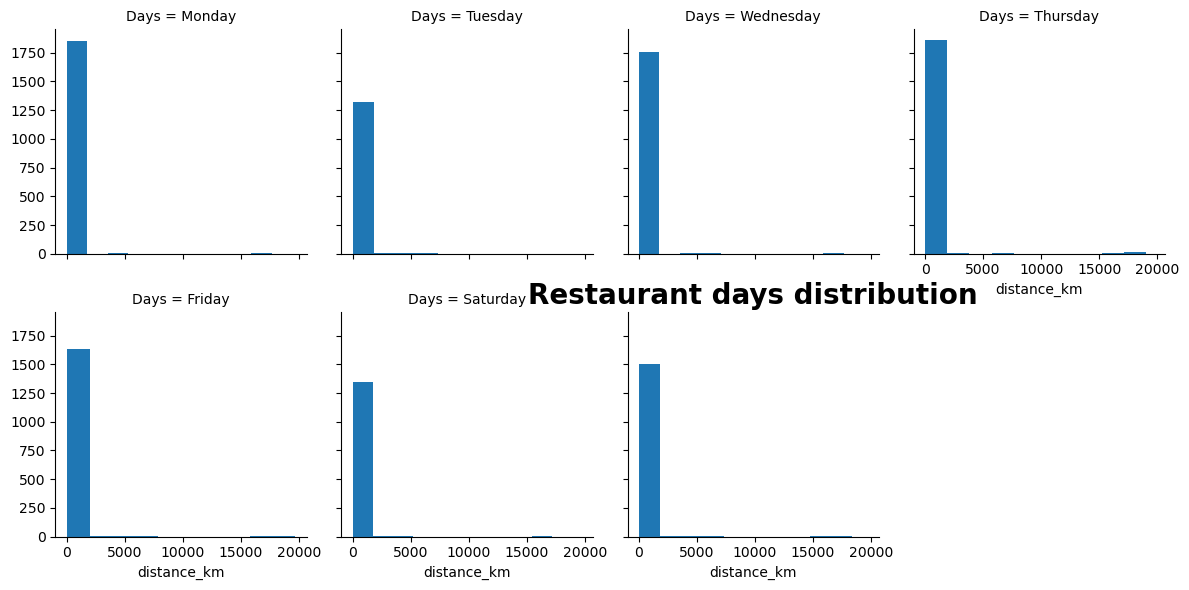

In [16]:
plt.figure(figsize = [10, 8])
orderby = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'];
g = sn.FacetGrid(data = food, col = 'Days',col_wrap = 4,col_order =orderby);
plt.title("Restaurant days distribution", y=1.0, fontsize=20, fontweight='bold')
g.map(plt.hist, "distance_km");


From the graph, it clear that Thursdays are the weekdays that the restaurant delivers most patronize 

##### What is the relationship between the time taken to deliver food and the distance travelled? 

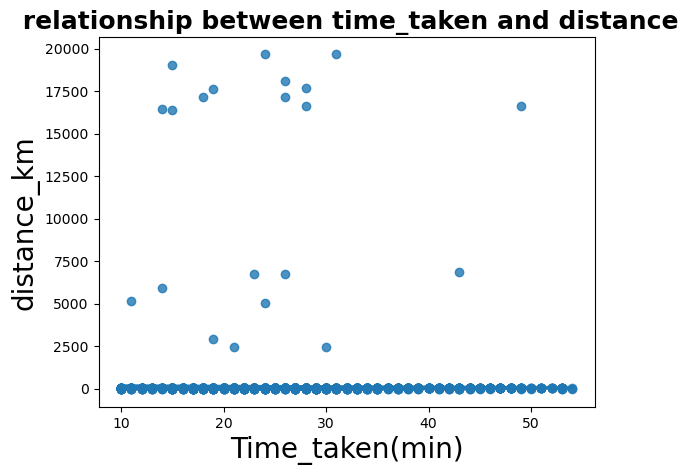

In [17]:
sn.regplot(data = food, x = 'Time_taken', y = 'distance_km');
plt.xlabel('Time_taken(min)',fontsize=20)
plt.ylabel('distance_km',fontsize=20)
plt.title(" relationship between time_taken and distance", y=1.0, fontsize=18, fontweight='bold');


From the scatter plot, it shows that though they are outliers, there is some correlation between the time taken and the distance.

##### What is the correlation between days of the week with respect to the type of vehicle used to deliver food and the distance covered? 

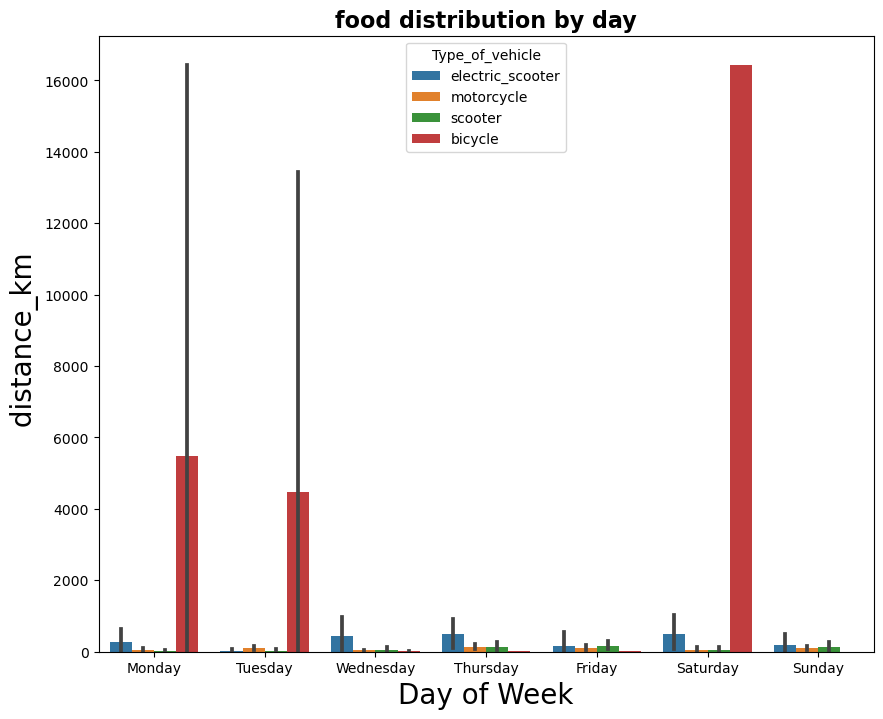

In [18]:
plt.figure(figsize = [10, 8])
sn.barplot(data=food, x='Days', y='distance_km', hue='Type_of_vehicle', dodge=0.3,order = orderby);
plt.title("food distribution by day", y=1.0, fontsize=16, fontweight='bold')
plt.xlabel('Day of Week',fontsize=20);
plt.ylabel(' distance_km',fontsize=20);

From the diagram above, it shows that the restaurant utilized bicycles the most to cover longer distance on Saturdays

##### From which city does the restaurant get most orders 

In [19]:
food['City'].value_counts()

Metropolitian    8497
Urban            2533
Semi-Urban         45
Name: City, dtype: int64

In [20]:
food['City']=food['City'].fillna('non_specified')
food['City']

0        Metropolitian
1        Metropolitian
2        Metropolitian
3        Metropolitian
4        Metropolitian
             ...      
11394    Metropolitian
11395    Metropolitian
11396    Metropolitian
11397    Metropolitian
11398            Urban
Name: City, Length: 11399, dtype: object

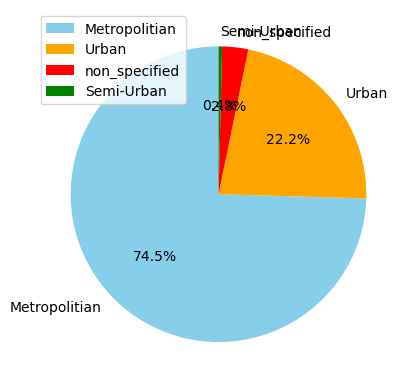

In [21]:
plt.pie(food['City'].value_counts().head(10), 
        labels=food['City'].value_counts().head().index,autopct='%1.1f%%',
        colors=['skyblue', 'orange', 'red', 'green'],startangle=90
        
        
       );
plt.legend();

It is clear from the analysis that most people who order from the restaurant are from metropolitian cities

In [22]:
food['Time_Orderd'].value_counts()

18:20    123
20:55    122
23:30    122
19:15    120
19:20    119
        ... 
13:35     11
13:60     11
14:60     11
12:35     10
13:25     10
Name: Time_Orderd, Length: 176, dtype: int64

##### Does the traffic density influence what time orders are made?

In [23]:
food['Road_traffic_density']=food['Road_traffic_density'].fillna('non_specified')


In [24]:
food['Road_traffic_density'].value_counts()

Low              3881
Jam              3503
Medium           2751
High             1110
non_specified     154
Name: Road_traffic_density, dtype: int64

In [25]:
State_traffic_density=food.groupby('Road_traffic_density')['Time_Orderd'].value_counts().sort_values(ascending=False).head(10)
State_traffic_density

Road_traffic_density  Time_Orderd
Medium                18:20          123
Low                   23:30          122
Jam                   20:55          122
                      19:15          120
                      19:20          119
                      21:45          118
Low                   23:60          118
                      22:40          118
Medium                18:30          118
Low                   23:10          117
Name: Time_Orderd, dtype: int64

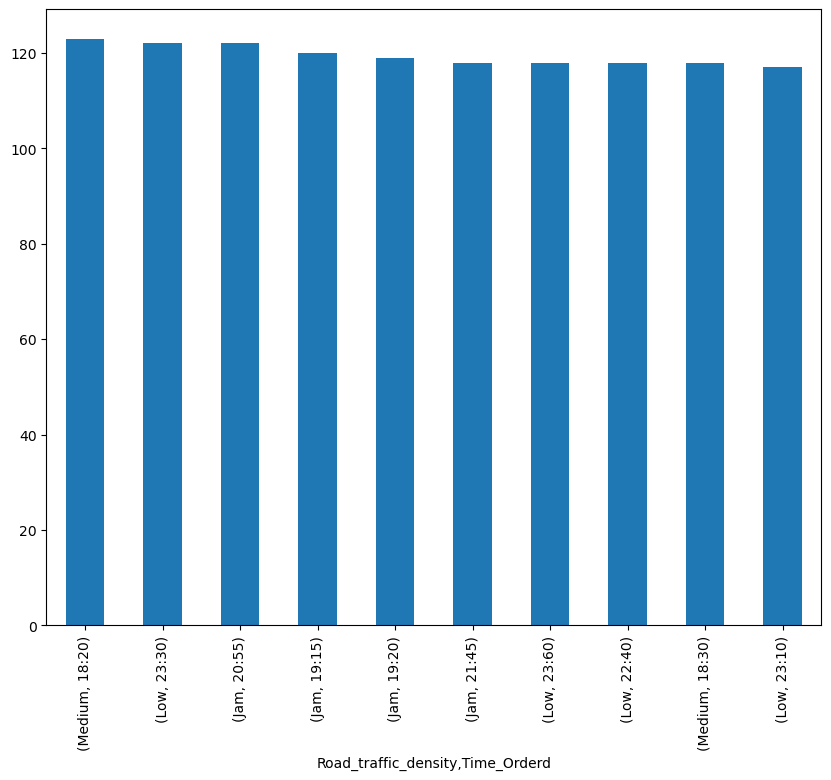

In [26]:
State_traffic_density.plot(x='Road_traffic_density',y='Time_Orderd',kind='bar',figsize=(10,8));

Most of the orders are made after 17h where the trafic density is not high

##### What order type is more prefered, creat a piechart for type of order

In [27]:
Order_type=food['Type_of_order'].value_counts()
Order_type

Drinks    2920
Buffet    2870
Snack     2815
Meal      2794
Name: Type_of_order, dtype: int64

In [28]:
Order_type=food['Type_of_order'].isnull().sum()
Order_type

0

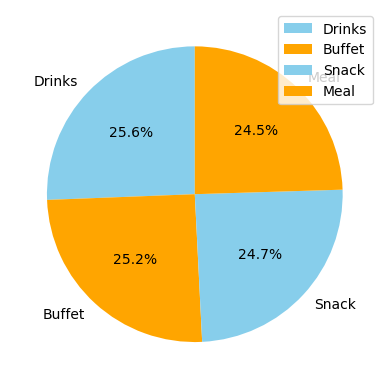

In [29]:
plt.pie(food['Type_of_order'].value_counts().head(10), 
        labels=food['Type_of_order'].value_counts().head().index,autopct='%1.1f%%',
        colors=['skyblue', 'orange'],startangle=90
        
        
       );
plt.legend();

Per the analsysi, it understood that most customers enjoy drinks compared to Meals

##### Does the weather inflence what people order?

filling in null values for te weather

In [30]:
food['Weather']=food['Weather'].fillna('non_specified')
food['Weather']

0        non_specified
1                Windy
2               Stormy
3                  Fog
4                Sunny
             ...      
11394            Sunny
11395       Sandstorms
11396    non_specified
11397       Sandstorms
11398            Windy
Name: Weather, Length: 11399, dtype: object

In [31]:
weather=food['Weather'].value_counts()
weather

Sunny            1975
Windy            1948
Sandstorms       1878
Cloudy           1861
Stormy           1811
Fog              1768
non_specified     158
Name: Weather, dtype: int64

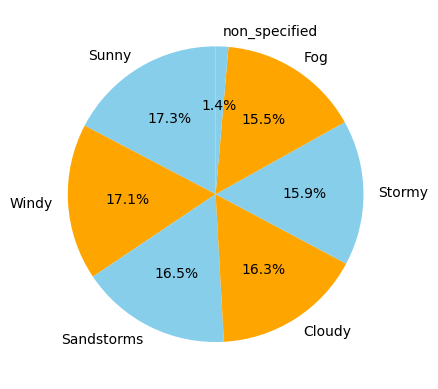

In [32]:
plt.pie(food['Weather'].value_counts().head(10), 
        labels=food['Weather'].value_counts().index,autopct='%1.1f%%',
        colors=['skyblue', 'orange'],startangle=90
        
        
       );


In [33]:
Order_Weather=food.groupby('Type_of_order')['Weather'].value_counts().sort_values(ascending=False).head(10)
Order_Weather

Type_of_order  Weather   
Drinks         Sunny         517
               Windy         507
Meal           Sunny         498
Snack          Cloudy        491
               Windy         485
Buffet         Sandstorms    485
               Windy         482
               Sunny         482
Drinks         Stormy        481
               Fog           478
Name: Weather, dtype: int64

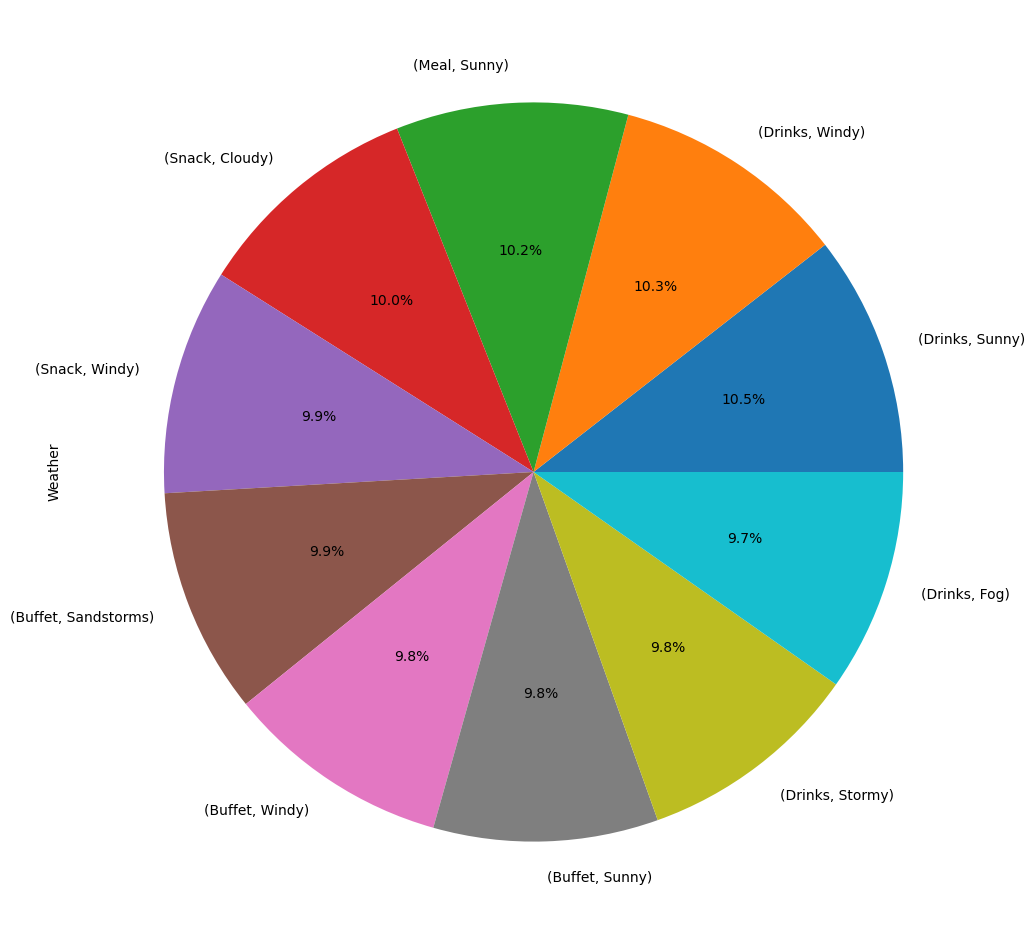

In [34]:
Order_Weather.plot(x='Order_type',y='Weather',kind='pie',autopct='%1.1f%%',figsize=(16,12));

In [35]:
Order_Weather=food.groupby(['Type_of_order','Weather'])['Weather'].count().unstack('Type_of_order');
Order_Weather

Type_of_order,Buffet,Drinks,Meal,Snack
Weather,,,,
Cloudy,476,427,467,491
Fog,440,478,408,442
Sandstorms,485,473,450,470
Stormy,475,481,449,406
Sunny,482,517,498,478
Windy,482,507,474,485
non_specified,30,37,48,43


In [36]:
from matplotlib import cm

In [37]:
cmap=cm.get_cmap('magma')

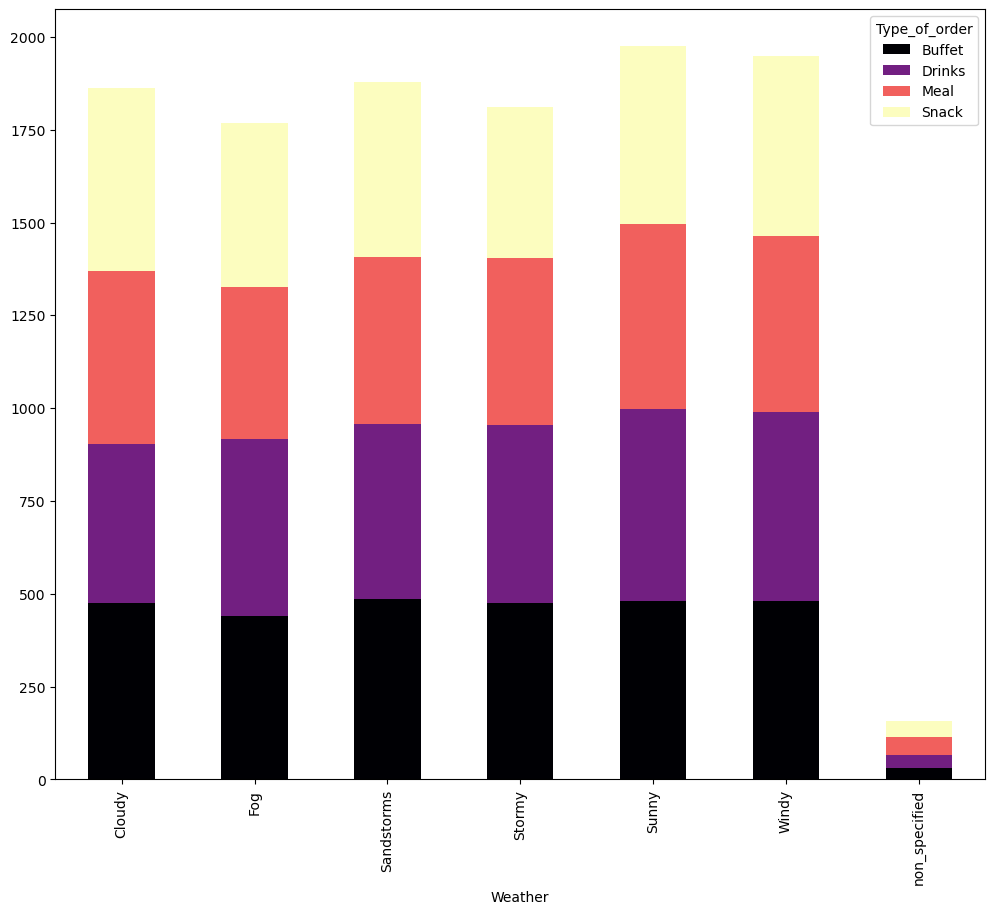

In [38]:
Order_Weather.plot(kind='bar',stacked=True,figsize=(12,10),cmap=cmap,edgecolor='None');

From the chart, it shows that most people prefer to have some drinks on sunny days

##### What meaans of transportation delievers food faster?

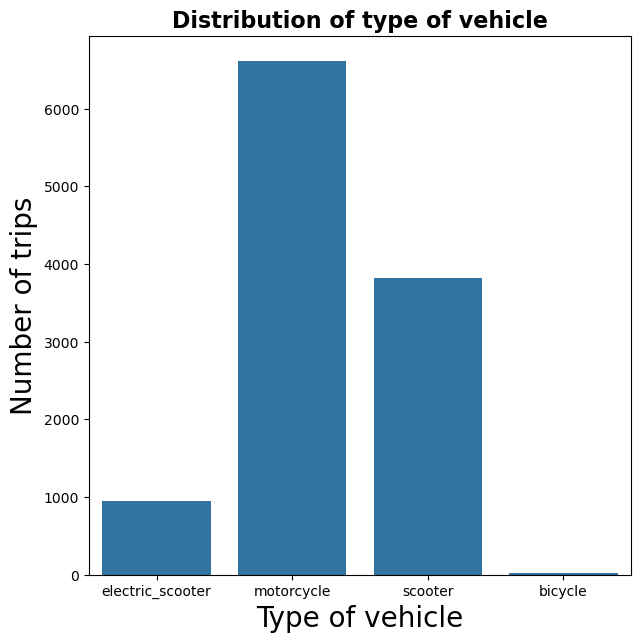

In [39]:
plt.figure(figsize = [7, 7])
color = sn.color_palette()[0]
sn.countplot(data = food, x = 'Type_of_vehicle', color = color)
plt.title('Distribution of type of vehicle',y=1.0, fontsize=16, fontweight='bold')
plt.xlabel('Type of vehicle',fontsize=20)
plt.ylabel('Number of trips',fontsize=20);

In [40]:
Transportation=food['Type_of_vehicle'].value_counts()
Transportation

motorcycle          6609
scooter             3817
electric_scooter     950
bicycle               23
Name: Type_of_vehicle, dtype: int64

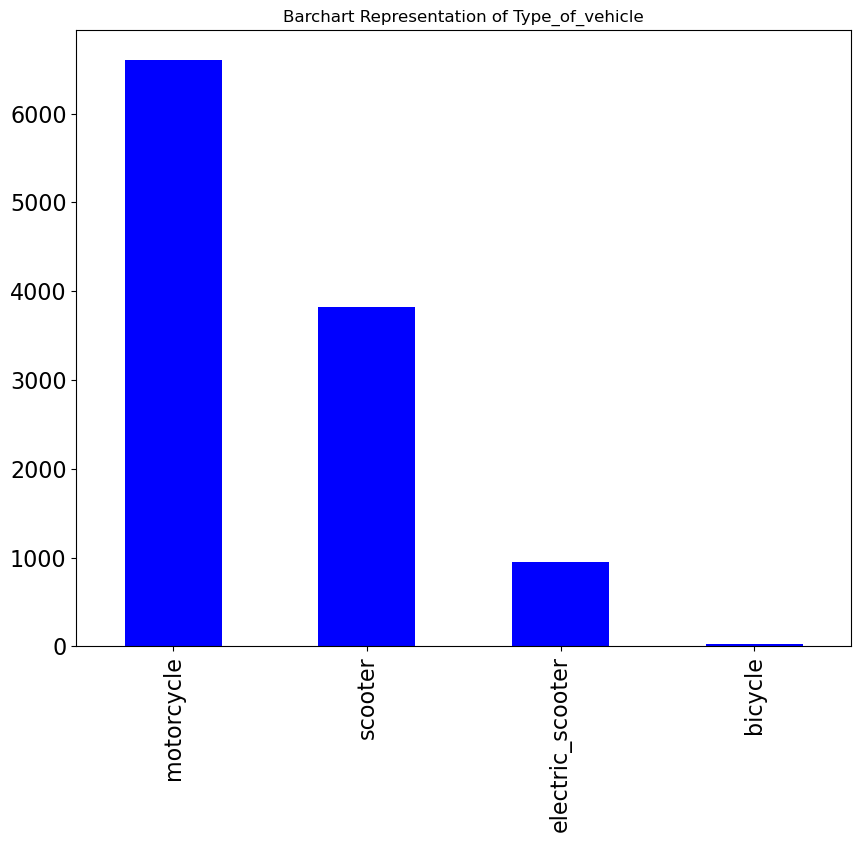

In [41]:
Transportation.plot(kind='bar',figsize=(10,8),fontsize=16,title="Barchart Representation of Type_of_vehicle", color="blue");

From the graph, it is clear that motorcycle is the most preferred vehicle type used by the restaurant

##### What time do people pick their orders most?

In [42]:
Time_picked=food['Time_Order_picked'].value_counts().head(10)
Time_picked

19:25    133
23:35    129
18:40    127
23:50    125
17:45    124
22:40    123
22:45    121
20:55    121
20:40    118
18:35    118
Name: Time_Order_picked, dtype: int64

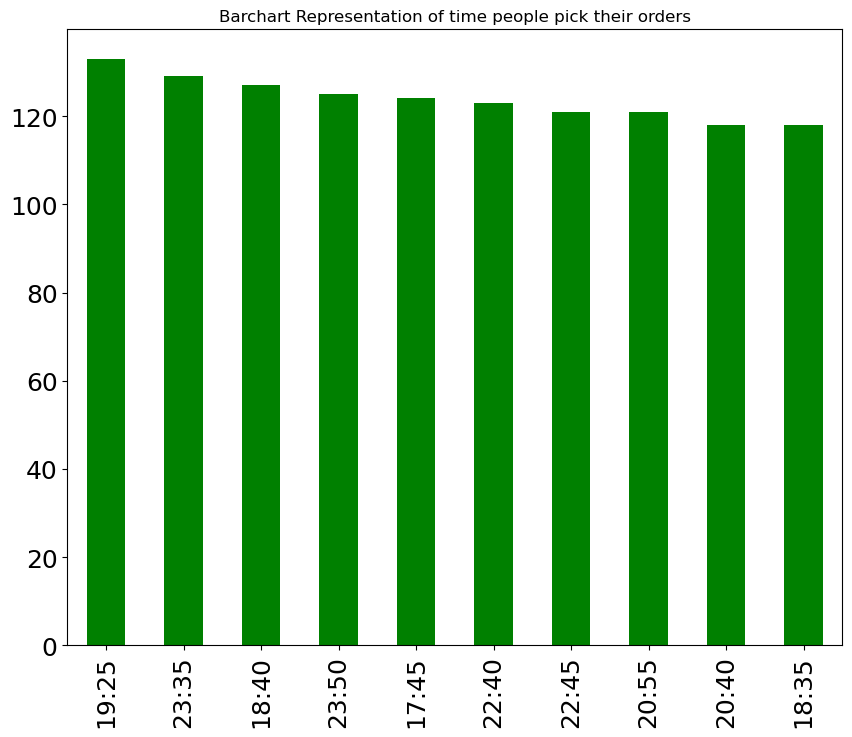

In [43]:
Time_picked.plot(kind='bar',figsize=(10,8),fontsize=18,title="Barchart Representation of time people pick their orders", color="green");

 From our analsysi, it shows that most people pick their orders at 19:25

##### At what time do people make most orders?

In [44]:
Time_orderd=food['Time_Orderd'].value_counts().head(10)
Time_orderd

18:20    123
20:55    122
23:30    122
19:15    120
19:20    119
18:30    118
22:40    118
21:45    118
23:60    118
23:10    117
Name: Time_Orderd, dtype: int64

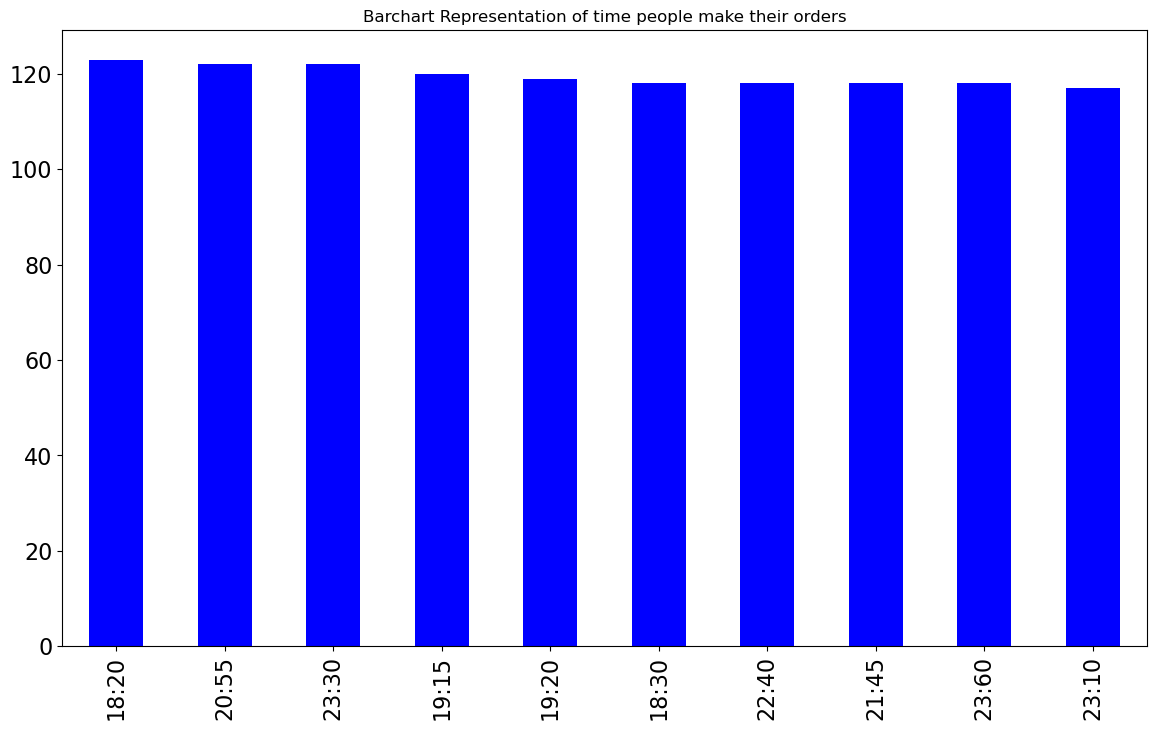

In [45]:
Time_orderd.plot(kind='bar',figsize=(14,8),fontsize=16,title="Barchart Representation of time people make their orders",color="blue");

##### Which days are the busiest in the restaurant [which days do customers visit the restaurant the most]

In [46]:
Days=food['Days'].value_counts().head(10)
Days

Thursday     1887
Monday       1868
Wednesday    1766
Friday       1658
Sunday       1521
Saturday     1360
Tuesday      1339
Name: Days, dtype: int64

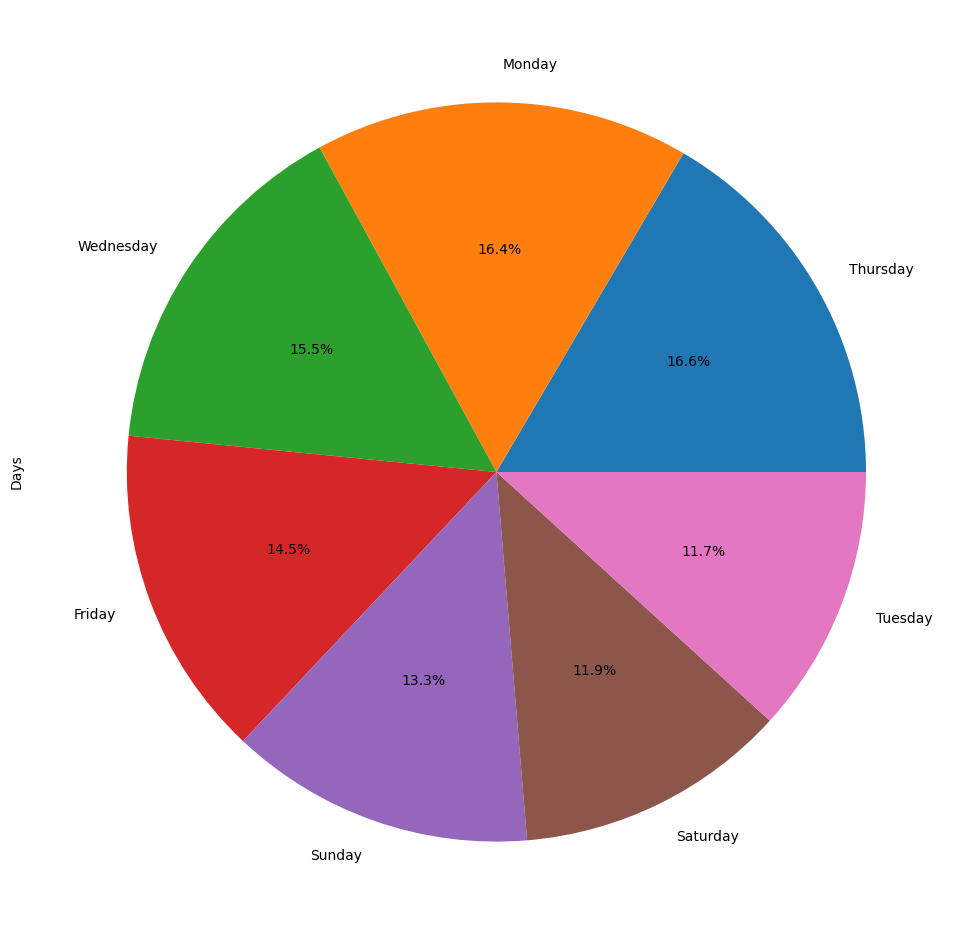

In [47]:
Days.plot(x='Days',kind='pie',autopct='%1.1f%%',figsize=(14,12));

From the pie chart, it shows that Thursdays are the most preferred days customers come to the restaurant. It recorded 16.5% in comparison to Tuesday with a lowest percentage of 11.7% . 

## Machine learning scenario


In [48]:
food.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Name:,Time_taken,Days,distance_km
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,2022-03-30,NaN,...,3,Drinks,electric_scooter,1.0,No,Metropolitian,object,24.0,Wednesday,6.232373
1,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,77.696664,13.085377,77.806664,2022-03-29,20:30,...,0,Snack,motorcycle,1.0,No,Metropolitian,object,33.0,Tuesday,17.076617
2,0x9420,JAPRES09DEL03,23.0,4.5,26.911378,75.789034,27.001378,75.879034,2022-10-03,19:35,...,0,Drinks,motorcycle,1.0,No,Metropolitian,object,42.0,Monday,13.406029
3,0x72ee,JAPRES07DEL03,21.0,4.8,26.766536,75.837333,26.856536,75.927333,2022-02-04,17:15,...,1,Meal,scooter,1.0,No,Metropolitian,object,19.0,Friday,13.413644
4,0xa759,CHENRES19DEL01,31.0,4.6,12.986047,80.218114,13.096047,80.328114,2022-03-27,18:25,...,2,Drinks,scooter,1.0,No,Metropolitian,object,25.0,Sunday,17.076259


In [49]:
food_delivery=food.drop(['ID','Delivery_person_ID','Delivery_person_Age','Delivery_person_Ratings','Weather','Road_traffic_density','Vehicle_condition','multiple_deliveries','Festival','City','Name:','Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude','Order_Date','Time_Orderd','Time_Order_picked'],axis='columns')
food_delivery.head(10)

,Type_of_order,Type_of_vehicle,Time_taken,Days,distance_km
0,Drinks,electric_scooter,24.0,Wednesday,6.232373
1,Snack,motorcycle,33.0,Tuesday,17.076617
2,Drinks,motorcycle,42.0,Monday,13.406029
3,Meal,scooter,19.0,Friday,13.413644
4,Drinks,scooter,25.0,Sunday,17.076259
5,Drinks,motorcycle,14.0,Tuesday,1.543933
6,Buffet,scooter,29.0,Tuesday,3.105485
7,Meal,motorcycle,22.0,Sunday,7.567851
8,Snack,scooter,28.0,Thursday,13.989512
9,Meal,motorcycle,12.0,Wednesday,4.610614


### Converting some columns from words to digit using labelEncoder and fit transform

In [50]:
from sklearn.preprocessing import LabelEncoder

le_Type_of_order=LabelEncoder()
le_Type_of_vehicle=LabelEncoder()
le_Days=LabelEncoder()

In [51]:
food_delivery['Type_of_order']=le_Type_of_order.fit_transform(food_delivery['Type_of_order'])
food_delivery['Type_of_vehicle']=le_Type_of_vehicle.fit_transform(food_delivery['Type_of_vehicle'])
food_delivery['Days']=le_Days.fit_transform(food_delivery['Days'])


In [52]:
food_delivery

,Type_of_order,Type_of_vehicle,Time_taken,Days,distance_km
0,1,1,24.0,6,6.232373
1,3,2,33.0,5,17.076617
2,1,2,42.0,1,13.406029
3,2,3,19.0,0,13.413644
4,1,3,25.0,3,17.076259
...,...,...,...,...,...
11394,3,3,NaN,3,16.384901
11395,1,3,NaN,4,1.489842
11396,1,3,NaN,4,9.121874
11397,2,2,NaN,0,19.687777


checking and filling null values in Time_taken column

In [53]:
import math

In [54]:
inputs=math.floor(food_delivery['Time_taken'].median())
inputs

26

In [55]:
input=food_delivery.fillna(inputs)
input.head(10)

,Type_of_order,Type_of_vehicle,Time_taken,Days,distance_km
0,1,1,24.0,6,6.232373
1,3,2,33.0,5,17.076617
2,1,2,42.0,1,13.406029
3,2,3,19.0,0,13.413644
4,1,3,25.0,3,17.076259
5,1,2,14.0,5,1.543933
6,0,3,29.0,5,3.105485
7,2,2,22.0,3,7.567851
8,3,3,28.0,4,13.989512
9,2,2,12.0,6,4.610614


In [56]:
input.isnull().sum()

Type_of_order      0
Type_of_vehicle    0
Time_taken         0
Days               0
distance_km        0
dtype: int64

Dropping out the target variable

In [57]:
inputs=input.drop(['Time_taken'],axis='columns')
target=input['Time_taken']
target

0        24.0
1        33.0
2        42.0
3        19.0
4        25.0
         ... 
11394    26.0
11395    26.0
11396    26.0
11397    26.0
11398    26.0
Name: Time_taken, Length: 11399, dtype: float64

In [70]:
inputs

,Type_of_order,Type_of_vehicle,Days,distance_km
0,1,1,6,6.232373
1,3,2,5,17.076617
2,1,2,1,13.406029
3,2,3,0,13.413644
4,1,3,3,17.076259
...,...,...,...,...
11394,3,3,3,16.384901
11395,1,3,4,1.489842
11396,1,3,4,9.121874
11397,2,2,0,19.687777


In [71]:
from sklearn import tree
model=tree.DecisionTreeClassifier()


In [72]:
model.fit(inputs,target)

DecisionTreeClassifier()

##### Mrs Ndidi ordered meals at the amazon restaurant on Thursday morning. Predict how long before she received her order if the delivery man used motorcycle bearing in mind that the customer  stays 9.760928 km away from the restaurant.

In [73]:
model.predict([[2,4,5,9.760928 ]])

C:\Users\juliy\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([26.])

According to our analysis, it indicates that the customer will receive her order in 26 minutes

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2)

In [75]:
model.score(inputs,target)

0.9840336871655408

Our model shows an accuracy score of 98%

In [76]:
# Create a Pickle file 

import pickle

pickle_out = open("model.pkl","wb")

pickle.dump(model, pickle_out)

pickle_out.close()

In [89]:

# if you don't have scaler use this way 
input_data=[[2,4,5,9.760928 ]]
result=model.predict(input_data)[0]
print(result)





26.0


C:\Users\juliy\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


##### using linear regression model

In [64]:
from sklearn import linear_model

In [65]:
reg = linear_model.LinearRegression()
reg.fit(inputs, target)

LinearRegression()

In [66]:
reg.predict([[2,4,5,9.760928]])

C:\Users\juliy\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([26.43485171])

Validating Prediction

In [67]:
reg.coef_

array([-5.84737181e-02,  1.92261728e-01,  1.01874228e-02, -2.88044409e-05])

In [68]:
reg.intercept_

25.732096278581974

In [69]:
#y =mx + c
#dependent variable = (slope or gradient * independent variable ) + intercept. the coefficient of x represents the gradient, i.e "m"
#Time_taken= (coef1*Type_of_order + coef2*Type_of_vehicle + coef3*days+coef4+distance)+intercept
Time_taken2 = (-5.84737181e-02*2 +1.92261728e-01 *4 + 1.01874228e-02*5 + -2.88044409e-05*9.760928) + 25.732096278581974
Time_taken2

26.43485171030827